## Feature Engineering

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('loan_data.csv')

In [5]:
df.head()

,Id,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,_RARE_,Male,No,0,Not Graduate,No,2265,2292,86.0,360.0,NaN,Rural,N
1,_RARE_,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1.0,Rural,Y
2,_RARE_,Female,No,1,Graduate,NaN,4120,0,40.0,420.0,1.0,Semiurban,Y
3,_RARE_,Male,Yes,0,Graduate,No,8001,0,30.0,360.0,1.0,Semiurban,N
4,_RARE_,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Id', 'Gender', 'Marital Status', 'Family members',
       'Status of education', 'Self_Employed', 'Income of applicant',
       'Income of coapplicant', 'LoanAmount applied for (in thoudands)',
       'Loan_Amount_Duration', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [7]:
df.describe()

,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History
count,1000.000000,1000.000000,955.000000,970.000000,925.000000
mean,4985.024000,1623.355000,140.621990,343.448454,0.830270
std,4117.207019,1957.376118,74.612307,60.847149,0.375598
min,1000.000000,0.000000,30.000000,84.000000,0.000000
25%,2715.750000,0.000000,100.000000,360.000000,1.000000
50%,3719.000000,1250.000000,125.000000,360.000000,1.000000
75%,5652.500000,2469.000000,160.500000,360.000000,1.000000
max,33136.000000,10968.000000,496.000000,480.000000,1.000000


In [8]:
df.isnull().sum().sort_values(ascending=True)

Id                                        0
Marital Status                            0
Status of education                       0
Income of applicant                       0
Income of coapplicant                     0
Property_Area                             0
Loan_Status                               0
Family members                           24
Gender                                   26
Loan_Amount_Duration                     30
LoanAmount applied for (in thoudands)    45
Self_Employed                            52
Credit_History                           75
dtype: int64

In [9]:
df.isnull().mean().sort_values(ascending=True)

Id                                       0.000
Marital Status                           0.000
Status of education                      0.000
Income of applicant                      0.000
Income of coapplicant                    0.000
Property_Area                            0.000
Loan_Status                              0.000
Family members                           0.024
Gender                                   0.026
Loan_Amount_Duration                     0.030
LoanAmount applied for (in thoudands)    0.045
Self_Employed                            0.052
Credit_History                           0.075
dtype: float64

In [10]:
df.shape

(1000, 13)

## Lets compute the frequency with every feature null values

In [11]:
df.groupby(['Family members'])['Family members'].count()

Family members
0     575
1     159
2     164
3+     78
Name: Family members, dtype: int64

<AxesSubplot:xlabel='Family members'>

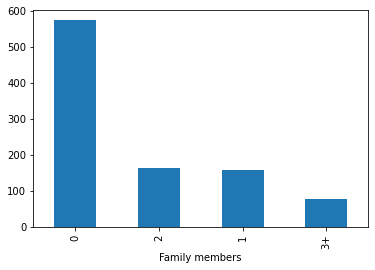

In [12]:
df.groupby(['Family members'])['Family members'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

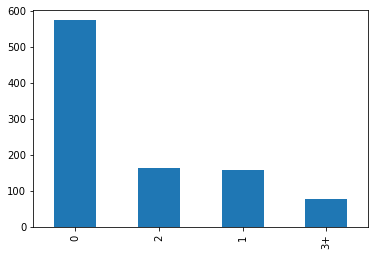

In [13]:
## We can also use another method instead groupby-

df['Family members'].value_counts().plot.bar()

In [14]:
## Will do this for all the null categories-

df['Gender'].value_counts()

Male      808
Female    166
Name: Gender, dtype: int64

<AxesSubplot:>

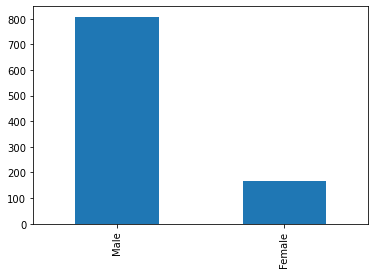

In [15]:
df['Gender'].value_counts().plot.bar()

In [16]:
df['Loan_Amount_Duration'].value_counts()

360.0    844
180.0     57
300.0     17
480.0     17
84.0      12
120.0      8
280.0      2
184.0      2
364.0      2
100.0      2
420.0      1
220.0      1
181.0      1
140.0      1
340.0      1
260.0      1
400.0      1
Name: Loan_Amount_Duration, dtype: int64

<AxesSubplot:>

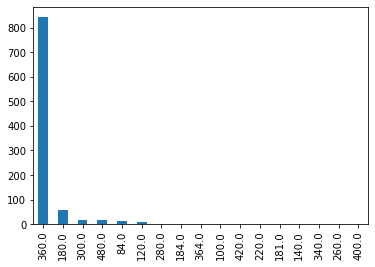

In [17]:
df['Loan_Amount_Duration'].value_counts().plot.bar()

In [18]:
df['LoanAmount applied for (in thoudands)'].value_counts()

120.0    35
100.0    35
110.0    30
130.0    25
150.0    15
         ..
208.0     1
481.0     1
370.0     1
276.0     1
259.0     1
Name: LoanAmount applied for (in thoudands), Length: 223, dtype: int64

<AxesSubplot:>

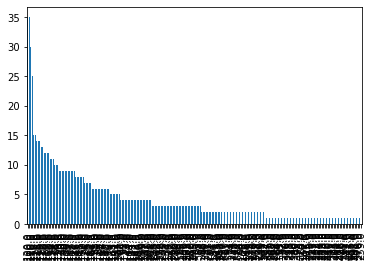

In [19]:
df['LoanAmount applied for (in thoudands)'].value_counts().plot.bar()

In [20]:
df['Self_Employed'].value_counts()

No     831
Yes    117
Name: Self_Employed, dtype: int64

<AxesSubplot:>

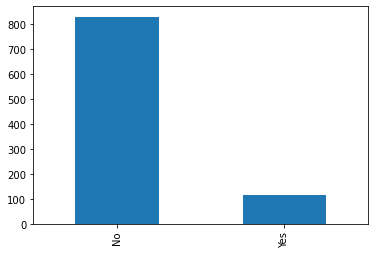

In [21]:
df['Self_Employed'].value_counts().plot.bar()

In [22]:
df['Credit_History'].value_counts()

1.0    768
0.0    157
Name: Credit_History, dtype: int64

<AxesSubplot:>

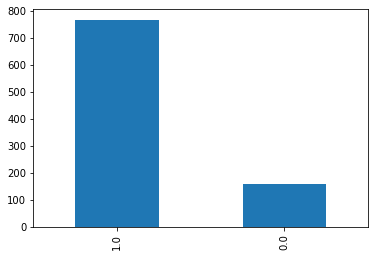

In [23]:
df['Credit_History'].value_counts().plot.bar()

## Lets replace null values using imputation-

In [24]:
df['Family members'].value_counts()

0     575
2     164
1     159
3+     78
Name: Family members, dtype: int64

In [25]:
df['Family members'].value_counts().index

Index(['0', '2', '1', '3+'], dtype='object')

In [26]:
df['Family members'].value_counts()[0]

575

In [27]:
df['Family members'].value_counts().index[0]

'0'

In [28]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [29]:
for feature in['Family members','Gender','Loan_Amount_Duration','LoanAmount applied for (in thoudands)','Self_Employed','Credit_History']:
    impute_nan(df,feature)
    

In [30]:
df.head()

,Id,Gender,Marital Status,Family members,Status of education,Self_Employed,Income of applicant,Income of coapplicant,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Property_Area,Loan_Status
0,_RARE_,Male,No,0,Not Graduate,No,2265,2292,86.0,360.0,1.0,Rural,N
1,_RARE_,Female,Yes,0,Graduate,Yes,2150,2674,110.0,360.0,1.0,Rural,Y
2,_RARE_,Female,No,1,Graduate,No,4120,0,40.0,420.0,1.0,Semiurban,Y
3,_RARE_,Male,Yes,0,Graduate,No,8001,0,30.0,360.0,1.0,Semiurban,N
4,_RARE_,Male,Yes,0,Graduate,No,2797,1713,121.0,360.0,0.0,Semiurban,N


In [31]:
df.isnull().sum()

Id                                       0
Gender                                   0
Marital Status                           0
Family members                           0
Status of education                      0
Self_Employed                            0
Income of applicant                      0
Income of coapplicant                    0
LoanAmount applied for (in thoudands)    0
Loan_Amount_Duration                     0
Credit_History                           0
Property_Area                            0
Loan_Status                              0
dtype: int64

## Another method-adding a variable to capture NAN in frequent category

In [36]:
df=pd.read_csv('loan_data.csv',usecols=['Family members','Gender','Loan_Amount_Duration','LoanAmount applied for (in thoudands)','Self_Employed','Credit_History'])
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History
0,Male,0,No,86.0,360.0,NaN
1,Female,0,Yes,110.0,360.0,1.0
2,Female,1,NaN,40.0,420.0,1.0
3,Male,0,No,30.0,360.0,1.0
4,Male,0,No,121.0,360.0,0.0


In [37]:
df['Family members_New']=np.where(df['Family members'].isnull(),1,0)

In [38]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New
0,Male,0,No,86.0,360.0,NaN,0
1,Female,0,Yes,110.0,360.0,1.0,0
2,Female,1,NaN,40.0,420.0,1.0,0
3,Male,0,No,30.0,360.0,1.0,0
4,Male,0,No,121.0,360.0,0.0,0


In [40]:
df['Family members'].mode()

0    0
Name: Family members, dtype: object

In [43]:
frequent=df['Family members'].mode()[0]

In [44]:
df['Family members'].fillna(frequent,inplace=True)

In [45]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New
0,Male,0,No,86.0,360.0,NaN,0
1,Female,0,Yes,110.0,360.0,1.0,0
2,Female,1,NaN,40.0,420.0,1.0,0
3,Male,0,No,30.0,360.0,1.0,0
4,Male,0,No,121.0,360.0,0.0,0


In [46]:
## Lets do this for other categories having NAN.
df['Self_Employed_New']=np.where(df['Self_Employed'].isnull(),1,0)
frequent=df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(frequent,inplace=True)

In [47]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New,Self_Employed_New
0,Male,0,No,86.0,360.0,NaN,0,0
1,Female,0,Yes,110.0,360.0,1.0,0,0
2,Female,1,No,40.0,420.0,1.0,0,1
3,Male,0,No,30.0,360.0,1.0,0,0
4,Male,0,No,121.0,360.0,0.0,0,0


In [48]:
df['LoanAmount applied for (in thoudands)_New']=np.where(df['LoanAmount applied for (in thoudands)'].isnull(),1,0)
frequent=df['LoanAmount applied for (in thoudands)'].mode()[0]
df['LoanAmount applied for (in thoudands)'].fillna(frequent,inplace=True)

In [49]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New,Self_Employed_New,LoanAmount applied for (in thoudands)_New
0,Male,0,No,86.0,360.0,NaN,0,0,0
1,Female,0,Yes,110.0,360.0,1.0,0,0,0
2,Female,1,No,40.0,420.0,1.0,0,1,0
3,Male,0,No,30.0,360.0,1.0,0,0,0
4,Male,0,No,121.0,360.0,0.0,0,0,0


In [50]:
df['Loan_Amount_Duration_New']=np.where(df['Loan_Amount_Duration'].isnull(),1,0)
frequent=df['Loan_Amount_Duration'].mode()[0]
df['Loan_Amount_Duration'].fillna(frequent,inplace=True)

In [51]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New,Self_Employed_New,LoanAmount applied for (in thoudands)_New,Loan_Amount_Duration_New
0,Male,0,No,86.0,360.0,NaN,0,0,0,0
1,Female,0,Yes,110.0,360.0,1.0,0,0,0,0
2,Female,1,No,40.0,420.0,1.0,0,1,0,0
3,Male,0,No,30.0,360.0,1.0,0,0,0,0
4,Male,0,No,121.0,360.0,0.0,0,0,0,0


In [52]:
df['Credit_History_New']=np.where(df['Credit_History'].isnull(),1,0)
frequent=df['Credit_History'].mode()[0]
df['Credit_History'].fillna(frequent,inplace=True)

In [53]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family members_New,Self_Employed_New,LoanAmount applied for (in thoudands)_New,Loan_Amount_Duration_New,Credit_History_New
0,Male,0,No,86.0,360.0,1.0,0,0,0,0,1
1,Female,0,Yes,110.0,360.0,1.0,0,0,0,0,0
2,Female,1,No,40.0,420.0,1.0,0,1,0,0,0
3,Male,0,No,30.0,360.0,1.0,0,0,0,0,0
4,Male,0,No,121.0,360.0,0.0,0,0,0,0,0


## Disadvantage
- Everytime we need to create additional features for NAN categories.

## Lets use most common way-
- We use this method when we are having frequent null values. We replace NAN with a new category.

In [54]:
df=pd.read_csv('loan_data.csv',usecols=['Family members','Gender','Loan_Amount_Duration','LoanAmount applied for (in thoudands)','Self_Employed','Credit_History'])
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History
0,Male,0,No,86.0,360.0,NaN
1,Female,0,Yes,110.0,360.0,1.0
2,Female,1,NaN,40.0,420.0,1.0
3,Male,0,No,30.0,360.0,1.0
4,Male,0,No,121.0,360.0,0.0


In [58]:
def impute_nan(df,variable):
    df[variable+'Newvar']=np.where(df[variable].isnull(),'Missing',df[variable])

In [59]:
for feature in['Family members','Gender','Loan_Amount_Duration','LoanAmount applied for (in thoudands)','Self_Employed','Credit_History']:
    impute_nan(df,feature)

In [60]:
df.head()

,Gender,Family members,Self_Employed,LoanAmount applied for (in thoudands),Loan_Amount_Duration,Credit_History,Family membersNewvar,GenderNewvar,Loan_Amount_DurationNewvar,LoanAmount applied for (in thoudands)Newvar,Self_EmployedNewvar,Credit_HistoryNewvar
0,Male,0,No,86.0,360.0,NaN,0,Male,360.0,86.0,No,Missing
1,Female,0,Yes,110.0,360.0,1.0,0,Female,360.0,110.0,Yes,1.0
2,Female,1,NaN,40.0,420.0,1.0,1,Female,420.0,40.0,Missing,1.0
3,Male,0,No,30.0,360.0,1.0,0,Male,360.0,30.0,No,1.0
4,Male,0,No,121.0,360.0,0.0,0,Male,360.0,121.0,No,0.0


In [61]:
## Lets drop old features-
df=df.drop(['Family members','Gender','Loan_Amount_Duration','LoanAmount applied for (in thoudands)','Self_Employed','Credit_History'],axis=1)

In [62]:
df.head()

,Family membersNewvar,GenderNewvar,Loan_Amount_DurationNewvar,LoanAmount applied for (in thoudands)Newvar,Self_EmployedNewvar,Credit_HistoryNewvar
0,0,Male,360.0,86.0,No,Missing
1,0,Female,360.0,110.0,Yes,1.0
2,1,Female,420.0,40.0,Missing,1.0
3,0,Male,360.0,30.0,No,1.0
4,0,Male,360.0,121.0,No,0.0
